# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project 3: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import renders as rs
from IPython.display import display # Allows the use of display() for DataFrames
import matplotlib.pyplot as plt

# Show matplotlib plots inline (nicely formatted in the notebook)
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [2]:
# Display a description of the dataset
display(data.describe())
data.head(20)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
5,9413,8259,5126,666,1795,1451
6,12126,3199,6975,480,3140,545
7,7579,4956,9426,1669,3321,2566
8,5963,3648,6192,425,1716,750
9,6006,11093,18881,1159,7425,2098


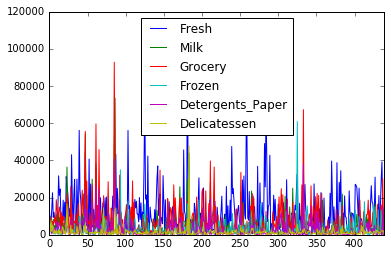

In [3]:
data.plot()

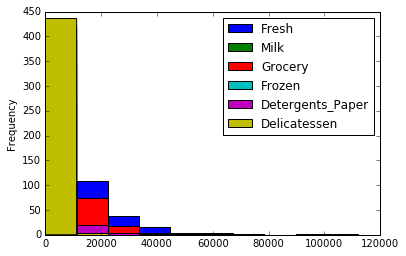

In [4]:
data.plot(kind='hist')

In [5]:
data.corr()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Fresh,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicatessen,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [6]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [4,11,12]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,22615,5410,7198,3915,1777,5185
1,13146,1124,4523,1420,549,497
2,31714,12319,11757,287,3881,2931


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,10615.0,-386.0,-753.0,843.0,-1104.0,3660.0
1,1146.0,-4672.0,-3428.0,-1652.0,-2332.0,-1028.0
2,19714.0,6523.0,3806.0,-2785.0,1000.0,1406.0


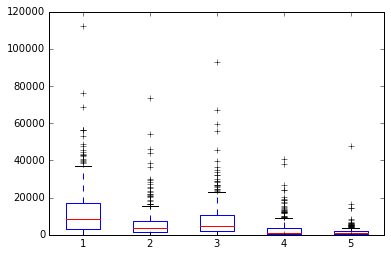

In [7]:
# How do these samples compare with the mean data
display(samples - np.round(data.mean()))
bp1 = plt.boxplot([data['Fresh'],data['Milk'],data['Grocery'],data['Detergents_Paper'], data['Delicatessen']])

### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

**Answer:** customer 0 spends a lot on almost all categories. It seems like a superstore as it has significant use of grocery+fresh for foods and Milk + Frozen for diary related (cafe) and Detergents + Paper for customers to clean up. Customer 1 could be a small retail store while the customer 2 could be a restaurant like establishment which does not sell much frozen stuff. 

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [8]:
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor
# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
for feature in data.columns:
    new_data = data.drop(feature,axis=1)
    new_label = data[feature]
    # TODO: Split the data into training and testing sets using the given feature as the target
    X_train, X_test, y_train, y_test = train_test_split(new_data, new_label, test_size=0.25, random_state=24)

    # TODO: Create a decision tree regressor and fit it to the training set
    regressor = DecisionTreeRegressor(random_state=24)
    regressor.fit(X_train,y_train)
    predictScores = regressor.predict(X_test)

    # TODO: Report the score of the prediction using the testing set
    score = regressor.score(X_test, y_test)
    print 'For %s the score is '%(feature),score

For Fresh the score is  -2.02602375642
For Milk the score is  0.228895149804
For Grocery the score is  0.683334361359
For Frozen the score is  -5.61413942694
For Detergents_Paper the score is  0.788189561586
For Delicatessen the score is  -1.0214951426


/Library/Python/2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature is necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer:** Since there are only a few features, I have tried all of them. I find that Detergents and Grocery have high scores. Detergents_paper has a score of 0.788 and Grocery has a score of 0.683. From the correlations I computed above, I do see that the Detergents and Grocery have very high correlation. Milk has a low score of 0.228 while others dont fit. Milk has some correlation with both Grocery and Detergents. (Fresh = -2.026, Frozen = -5.614, Delicatessen = -1.02). Clearly Detergents_paper and Grocery seem highly correlated with other features and are not both really necessary for identifying customer spending habits. It is possible that one of them is sufficient 

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

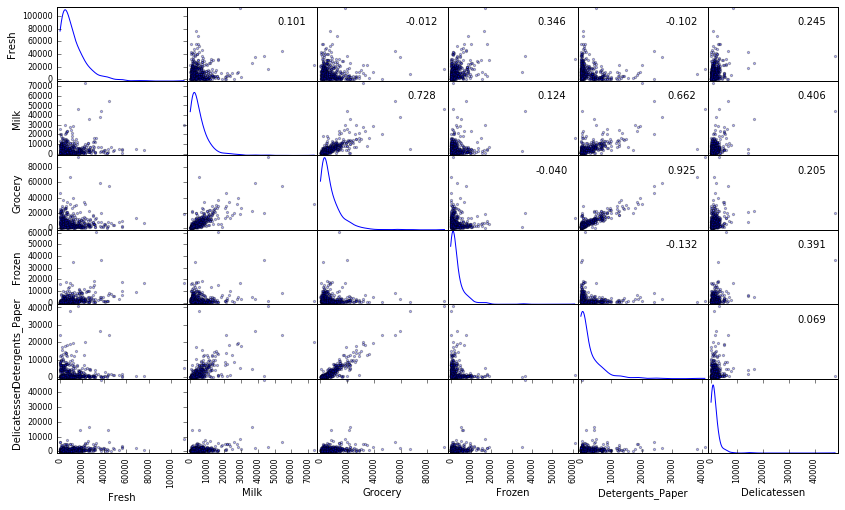

In [44]:
# Produce a scatter matrix for each pair of features in the data
axes = pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde')
corr = data.corr().as_matrix()
for i, j in zip(*np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')

### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

**Answer:** Grocery and Detergents_Paper are highly correlated with each other. The scatter plot for the pair shows a clear increasing trend between these two features.  There is some correlation between Grocery and Milk (and Detergents_Paper). 

The distribution for the features is not normal though they are centered around a mean. The left portion is truncated since the mean is close to 0. All the features are right skewed. Some of the features do seem to have additional peaks to the right suggests some minor modes.

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying a logarithm scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying a logrithm scaling. Again, use `np.log`.

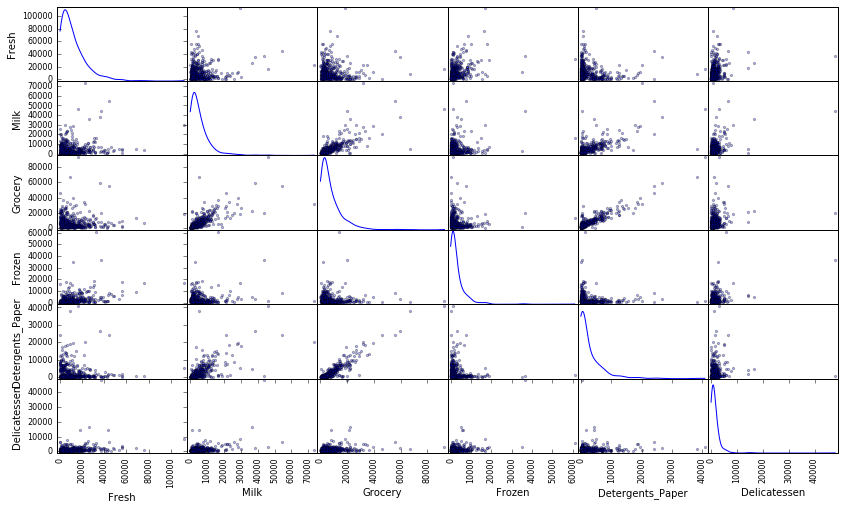

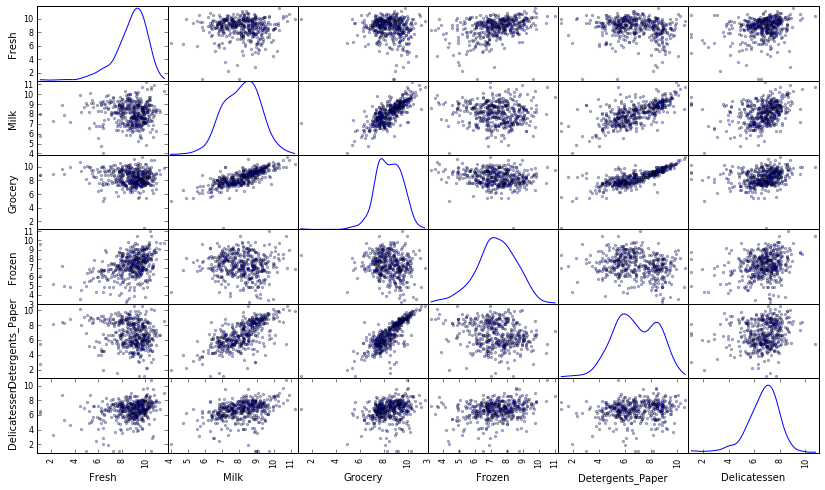

In [10]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [11]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,10.026369,8.596004,8.881558,8.272571,7.482682,8.553525
1,9.483873,7.024649,8.416931,7.258412,6.308098,6.208590
2,10.364514,9.418898,9.372204,5.659482,8.263848,7.983099


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [12]:
# For each feature find the data points with extreme high or low values
indexMap = {}
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5 * (Q3 - Q1)
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    f_data = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
    for obs in f_data.index:
        if obs not in indexMap:
            indexMap[obs] = 0
        indexMap[obs] += 1
    display(f_data)
    
# find the obs which are outliers in more than one features. 
for obs in indexMap:
    if indexMap[obs] > 1:
        print "observation {} is outlier for {} features".format(obs, indexMap[obs])
# OPTIONAL: Select the indices for data points you wish to remove
outliers  = [65,66,75,128,154]

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


observation 128 is outlier for 2 features
observation 154 is outlier for 3 features
observation 65 is outlier for 2 features
observation 66 is outlier for 2 features
observation 75 is outlier for 2 features


In [13]:
display(log_data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,8.730544,8.121047,8.441169,7.301396,6.785972,6.665133
std,1.480071,1.081365,1.116172,1.284540,1.721020,1.310832
min,1.098612,4.007333,1.098612,3.218876,1.098612,1.098612
25%,8.048059,7.334981,7.674616,6.609678,5.548101,6.011875
50%,9.048286,8.196159,8.467057,7.330388,6.705018,6.872645
75%,9.737064,8.880480,9.273854,8.175896,8.274341,7.506728
max,11.627601,11.205013,11.437986,11.016479,10.617099,10.777768


### Question 4
*Are there any data points considered outliers for more than one feature based on the definition above? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

**Answer:** Based on the definition, there are several points for each feature that would be considered outliers. Being considered outliers for just one dimension may not really make them outliers. To remove the observation it is surely necessary to understand how and why these data points arise. It is not appropriate to remove observations without such analysis. However, I chose to only remove those observations which are outliers for more than one dimension. 

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

[ 0.44302505  0.70681723  0.82988103  0.93109011  0.97959207  1.        ]


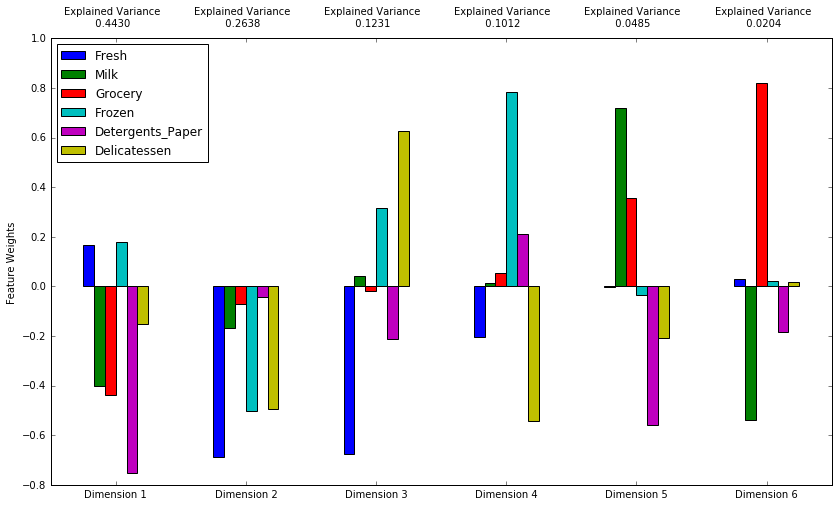

In [14]:
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', n_components=6, whiten=True).fit(good_data)

# TODO: Transform the sample log-data using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = rs.pca_results(good_data, pca)

print np.cumsum(pca.explained_variance_ratio_)

### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the individual feature weights.

**Answer:** The first two principal components account for 71.894523% of the total variance in the data while first 4 pcs account for 93.129585% variance. All the pca components are linear combinations of the given six features. 

The first dimension for example gives positive weights to the Fresh and Frozen features while giving large -ve weights to the Milk, grocery and Detergent Features. Given the large weights to (M, G and DP), this feature essentially summarizes the spending behaviour on these 3 features. Since these features are highly correlated, it is likely that this dimension tracks this correlated behaviour. This dimension represents all the establishments which give more importance to M,G and DP. This may not represent any specific establishment, but rather an important aspect of establishments which is their tendency to spend on these 3 attributes.

The second dimension has -ve weights on all features, but most prominent weights are on Fresh, Frozen and Delicatessen. So this dimension captures the establishments tendency to spend on Fresh, Fresh and Delicatessen products. 

The third dimension has large -ve weight on Milk and +ve weights on Frozen and Delicatessen. The fourth dimension primarily tracks the positive spending on Frozen and -ve spending on Delicatessen and Fresh products.  

So over all these four dimensions track these four behaviors. Since the first four dimensions capture about 93% of the variance, it seems most of the establishments can be expressed by these four behaviour patterns. 

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [15]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,-0.3684,-1.4565,0.4273,-0.3421,-0.4527,0.1341
1,0.4751,-0.0063,-0.6694,-0.0535,-0.6147,1.4439
2,-1.0518,-0.7555,-0.9556,-1.9238,0.3065,-0.3896


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the reuslts to `reduced_data`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [16]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(svd_solver='randomized', n_components=2, whiten=True).fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform the sample log-data using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [17]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,-0.3684,-1.4565
1,0.4751,-0.0063
2,-1.0518,-0.7555


## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer:** K-means algorithm is very simple and efficient way of computing clusters. The value of K has to be specified, which is an annoyance, but there are methods to find a proper K for the given data. Each observation is assigned to one and only one cluster based on some proximity measure. The K-means assume each cluster has similar variance and that the clusters are globular and can have problems if these assumptions are not met.  The K-means also scales extremely well to large values of K. 

The guassian mixture model can accomodate clusters with different variances and is usefule for soft clustering. It can handle cases where an observation can belong to multiple clusters. The gaussian mixture model does not scale well to large K values. 

Since we know that each observation is for one particular segment, use of K-means suffices here. 

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import sklearn.metrics.silhouette_score and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

N = 2, score = 0.375066218026
N = 3, score = 0.390255357431
N = 4, score = 0.365915476129
N = 5, score = 0.376876102831
N = 6, score = 0.356700007811
N = 7, score = 0.364066613131
N = 8, score = 0.349092496645
N = 9, score = 0.349762526083
N = 10, score = 0.352338148951
N = 11, score = 0.363843253179
N = 12, score = 0.345600898844
N = 13, score = 0.359683117078
N = 14, score = 0.351061666979
N = 15, score = 0.355677699886
N = 16, score = 0.338505142061
N = 17, score = 0.355973187947
N = 18, score = 0.354545879957
N = 19, score = 0.355327731226
N = 20, score = 0.349341990926
N = 21, score = 0.353117261297
N = 22, score = 0.345166187357
N = 23, score = 0.358019179218
N = 24, score = 0.361088036766
N = 25, score = 0.364017044356
N = 26, score = 0.35425602268
N = 27, score = 0.356292722358
N = 28, score = 0.348567593789
N = 29, score = 0.358869379629
N = 30, score = 0.354096700319
N = 31, score = 0.353340178791
N = 32, score = 0.365159092808
N = 33, score = 0.358464848187
N = 34, score = 0

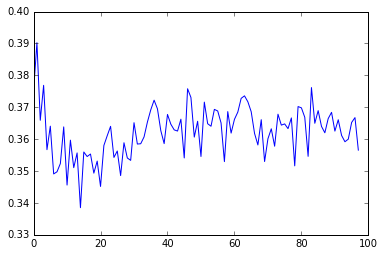

In [27]:
# TODO: Apply your clustering algorithm of choice to the reduced data 
from sklearn.cluster import KMeans
from sklearn import metrics
nmap = {}
for N in range(2,100,1):
    clusterer = KMeans(n_clusters=N, random_state=10)
    cluster_labels = clusterer.fit_predict(reduced_data)
    
    # TODO: Predict the cluster for each data point
    preds = cluster_labels

    # TODO: Find the cluster centers
    centers = clusterer.cluster_centers_

    # TODO: Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)
    
    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = metrics.silhouette_score(reduced_data, cluster_labels, metric='euclidean')
    nmap[N] = score
    print "N = {}, score = {}".format(N, score)
plt.plot(nmap.values())
optimalN = 3
clusterer = KMeans(n_clusters=optimalN, random_state=10)
cluster_labels = clusterer.fit_predict(reduced_data)
# TODO: Predict the cluster for each data point
preds = cluster_labels
sample_preds = clusterer.predict(pca_samples)

# TODO: Find the cluster centers
centers = clusterer.cluster_centers_

### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

**Answer:** I tried for N= 2 to 100. The values are posted above. The best silhoutte score occurs for N = 3. 

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

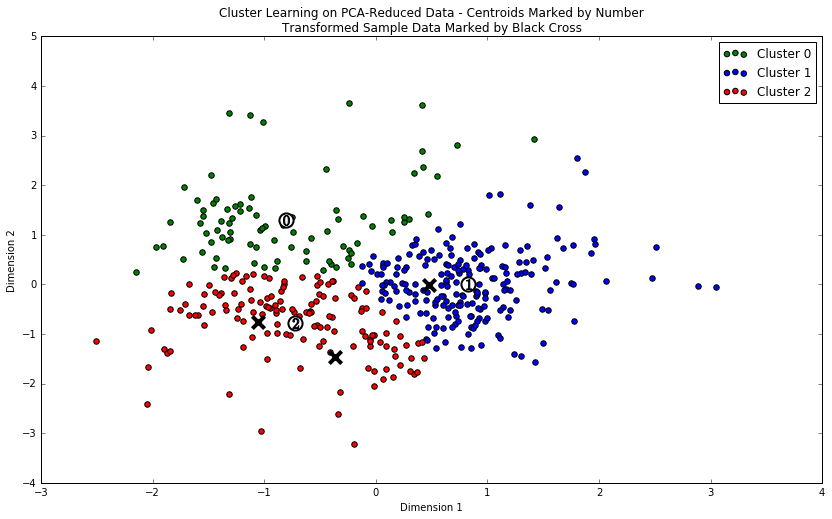

In [29]:
# Display the results of the clustering from implementation
import matplotlib.cm as cm
def cluster_results(reduced_data, preds, centers, pca_samples):
        '''
        Visualizes the PCA-reduced cluster data in two dimensions
        Adds cues for cluster centers and student-selected sample data
        '''

        predictions = pd.DataFrame(preds, columns = ['Cluster'])
        plot_data = pd.concat([predictions, reduced_data], axis = 1)

        # Generate the cluster plot
        fig, ax = plt.subplots(figsize = (14,8))

        # Color map
        cmap = cm.get_cmap('gist_rainbow')
        colors = [(0.0, 0.5, 0.0), (0.0, 0.0, 1.0), (1.0, 0.0, 0.0),  (1.0, 1.0, 1.0), (0.75, 0, 0.75), (0.0, 0.75, 0.75),  (1.0, 0.0, 0.0),  (0.75, 0.75, 0)]

        # Color the points based on assigned cluster
        for i, cluster in plot_data.groupby('Cluster'):
            cluster.plot(ax = ax, kind = 'scatter', x = 'Dimension 1', y = 'Dimension 2', \
                         color = colors[i], label = 'Cluster %i'%(i), s=30);

        # Plot centers with indicators
        for i, c in enumerate(centers):
            ax.scatter(x = c[0], y = c[1], color = 'white', edgecolors = 'black', \
                       alpha = 1, linewidth = 2, marker = 'o', s=200);
            ax.scatter(x = c[0], y = c[1], marker='$%d$'%(i), alpha = 1, s=100);

        # Plot transformed sample points
        ax.scatter(x = pca_samples[:,0], y = pca_samples[:,1], \
                   s = 150, linewidth = 4, color = 'black', marker = 'x');

        # Set plot title
        ax.set_title("Cluster Learning on PCA-Reduced Data - Centroids Marked by Number\nTransformed Sample Data Marked by Black Cross");


cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [30]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,1120.0,4716.0,8592.0,386.0,2960.0,365.0
Segment 1,8537.0,1662.0,2173.0,2063.0,237.0,615.0
Segment 2,11787.0,7788.0,10168.0,2168.0,3024.0,1902.0


### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

**Answer:** Segment 0 consists of customers who spend most on Fresh products and spend moderately on the other categories. This 
could be a 'corner store' or a small store which primarily caters to the needs of a small neighborhood. The segment 1 has a heavy spending on many categories and could be considered a larger store like a Safeway. Segment 2 with its heavy spending on Milk and Grocery and Detergents_Paper could be a coffee shop. 

### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [41]:
# Display the predictions
sample_preds = clusterer.predict(pca_samples)

display(samples)
display(true_centers)

for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred
    
def dist(samples, centers):
    d = samples.shape[1]
    for si in range(samples.shape[0]):
        p1 = samples.iloc[si]
        min_dist = 1e12
        n = centers.shape[0]
        min_center = -1
        for ci in range(n):
            dist = 0.0
            p2 = centers.iloc[ci]
            for i in range(d):
                dist += (p1[i] - p2[i]) * (p1[i] - p2[i])
            dist = np.sqrt(dist)

            if dist < min_dist:
                min_dist = dist
                min_center = ci
        print "Min dist of sample {} is to the cluster {}".format(si, min_center)
            

dist(samples, true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,22615,5410,7198,3915,1777,5185
1,13146,1124,4523,1420,549,497
2,31714,12319,11757,287,3881,2931


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,1120.0,4716.0,8592.0,386.0,2960.0,365.0
Segment 1,8537.0,1662.0,2173.0,2063.0,237.0,615.0
Segment 2,11787.0,7788.0,10168.0,2168.0,3024.0,1902.0


Sample point 0 predicted to be in Cluster 2
Sample point 1 predicted to be in Cluster 1
Sample point 2 predicted to be in Cluster 2
Min dist of sample 0 is to the cluster 2
Min dist of sample 1 is to the cluster 1
Min dist of sample 2 is to the cluster 2


**Answer:**
I observed that customer 0 could be a super store and the sample 0 does get assigned to the cluster 2 which I thought would be a super store. The Segment 1 represents customers who spend heavily on the all of the products. Customer 0 does spend quite a lot all the products (relative to other customers in the sample).

The customer 1, I thought would be a small retail and it turns out that customer 1 was assigned to the cluster 1 which represents a small retail store. Segment 0 represents customers who spend more on Fresh and moderately on other products. The customer 1 spends a lot of Fresh and moderately on other products. 


The customer 2 was presumed to be a restaurant like establishment and that customer is assigned to cluster 2 which represents establishments like superstores. Customer 2 also has similar purchase pattern as customer 0 in the sense that the customer spends a lot of Fresh, Milk and Grocery and moderately (relative to the spending on the first 3 categories) on others. 

So it does look like though scale of spending by customer 2 is much higher than that by customer 0, they both are in the same segment because they both exhibit similar relative preferences. I computed the actual euclidean distances of samples from all the centers and it does look like the they are closest to the centers they are assigned. This is interesting since the kmeans was run on pca-transformed-2-dimensional points.

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. *How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*  
**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:** To run an experiment, the distributor would first create customer segments based on their spending patterns (as above). Then he would take random test sample groups for each segments of same size. He also would have another random set called control group for each segment. The controls groups in each segment receive same service as before, while the test groups are subjected to service change (change from 5 to 3 days of delivery). After running this experiment for a while (when sufficient number of samples have been collected based on a statistical criteria), the distributor then compares the performance of control vs the test group in each segment. This performance comparison done based on statistical hypothesis testing will lead him to understand if any segments were significantly affected. The segment which is least affected or for which statistically there was no difference in behaviour of control and test groups should be selected for this service change. 

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
*How can the wholesale distributor label the new customers using only their estimated product spending and the* ***customer segment*** *data?*  
**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:** Each segment of customers have a segment label (which is a categorical variable) assigned to them. A classifier can be built for each segment using the customer spending data (and may be other demographic data too) with the target variable as the segment label. (Since there are 3 labels, a multiway classifier would be required here). With the classifier trained on the labelled data, the new customers can be classified into one of 3 segment labels. 

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

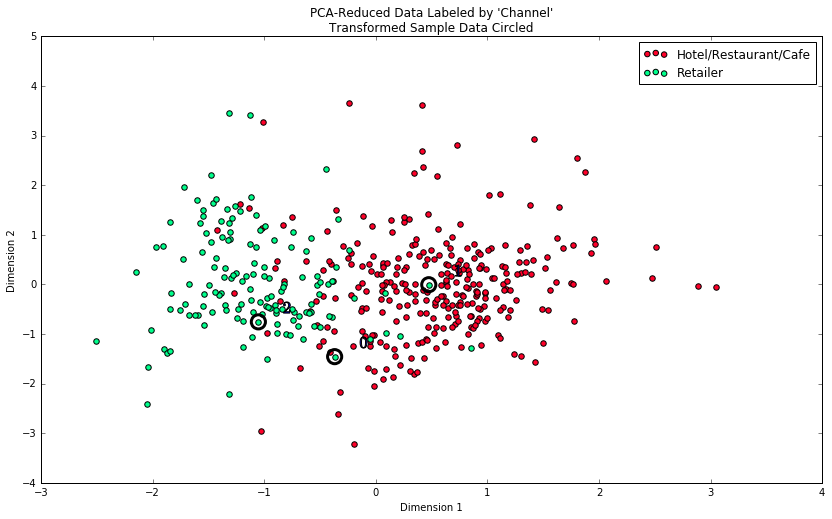

In [42]:
# Display the clustering results based on 'Channel' data
rs.channel_results(reduced_data, outliers, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:** I had chosen 3 as the number of clusters, while the data has two 2 segments. Looking at the true labels of Retailers - Horeca,  the clusters are well defined except for some points at the cluster borders and some points (some retailers for example) who are well into the other cluster. The PCA reduced data does not achieve the required seperation between the clusters. There are significant overlapping areas. But since the first two dimensions only capture 71.9% of the variation, so this is to be expected. 

The clustering I have produced captures most of the structure, but there are some significant deviations. My definition of what the clusters mean does seem to be incorrect. However clustering does capture most of the original structure. Several points in the original segments are in a cluster of their own. There two major deviations in my clustering. 
1. The Horeca segment which is Cluster 0 in my clustering retains most of its non border points, but loses most of its border points. The points in the lower middle have been assigned to Cluster 1. 
2. The new cluster (Cluster 2) takes away many points (points in the upper part of the picture) from Retailer segment and the Horeca segment. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.